In [1]:
import pandas as pd
import numpy as np
import os
from collections import namedtuple
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
args = {
    'score_path' : './binding_scores/',
}
args = namedtuple('args', args.keys())(*args.values())

In [3]:
rank = []
for filename in os.listdir(args.score_path):
    data = pd.read_csv(args.score_path + filename)
    index = data.index
    data_sorted = data.sort_values(by=['InterfE'])
    min_value = data_sorted.iloc[0]['InterfE']
    avg_rank = 1000
    for i, row in enumerate(data.iterrows()):
        if row[1]['InterfE'] == min_value:
            avg_rank = min(avg_rank, i)
    if avg_rank == 1000:
        continue
    rank.append(avg_rank + 1)

In [7]:
sum(rank) // len(rank)

28

In [10]:
import statistics
print(statistics.median(rank))

32.0


In [12]:
max(rank)

41

(array([ 8.,  7.,  8.,  7.,  7.,  5., 10., 47., 30., 39.]),
 array([ 1.,  5.,  9., 13., 17., 21., 25., 29., 33., 37., 41.]),
 <a list of 10 Patch objects>)

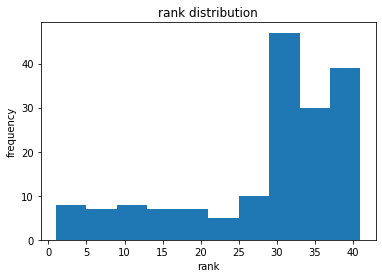

In [6]:
plt.title("rank distribution")
plt.xlabel("rank")
plt.ylabel("frequency")
plt.hist(rank)

In [7]:
data = data.sort_values(by=['InterfE'])[:10]

In [118]:
columns = ['Target', 'KendalR', 'SpearmanR', 'PearsonR']
stats_data = []
for filename in os.listdir(args.score_path):
    data = pd.read_csv(args.score_path + filename).dropna()
    if len(data) == 0:
        continue
    x = data['Binding-Score']
    y = data['InterfE']
    kendalr, _ = stats.kendalltau(x, y)
    spearmanr, _ = stats.spearmanr(x, y)
    pearsonr, _ = stats.pearsonr(x, y)
    
    target = data.iloc[0]['Target-Name']
    stats_data.append([target, kendalr, spearmanr, pearsonr])

stats_data = pd.DataFrame(data=stats_data, columns=columns)
stats_data = stats_data.sort_values(by=['KendalR'])
# stats_data.to_csv('corr_summary.csv', index=False)

In [119]:
stats_data[:10].style.background_gradient()

,Target,KendalR,SpearmanR,PearsonR
73,E9AQ39.0.apo,-0.347494,-0.470896,-0.320005
113,A0A3Q8IA63.0.apo,-0.313747,-0.432939,-0.272038
5,A0A088RZ69.0.apo,-0.281732,-0.396628,-0.227911
16,A0A088RNG1.0.apo,-0.275588,-0.389701,-0.248752
36,A0A3P3Z1R7.0.apo,-0.271784,-0.378095,-0.235808
98,A0A5K1VH91.0.apo,-0.270507,-0.367279,-0.241054
60,A0A3P3ZDV2.0.apo,-0.259283,-0.340000,-0.232994
141,A0A1E1J2F8.0.apo,-0.251856,-0.365823,-0.259748
123,A0A3G4YQ95.0.apo,-0.250466,-0.340141,-0.220626
97,E9AWJ0.0.apo,-0.232407,-0.336111,-0.133163


In [120]:
overlapping = []
for filename in os.listdir(args.score_path):
    data = pd.read_csv(args.score_path + filename)
    data = data.dropna()
    if len(data) == 0:
        continue
    data = data.sort_values(by=['Binding-Score'], ascending=False)
    s1 = set(data[:5]['Ligand-Name'].tolist())
    s2 = s1 & set(data[['Ligand-Name', 'InterfE']].sort_values(by=['InterfE'])['Ligand-Name'][:5])
    target = ".".join(filename.split('-')[-1].split('.')[:-1])
    overlapping.append([target, len(s2) / len(s1)])

overlapping = pd.DataFrame(data=overlapping, columns=['Target', '%overlapping'])
overlapping.sort_values(by=['%overlapping'], inplace=True, ascending=False)
overlapping.to_csv('overlapping.csv', index=False)

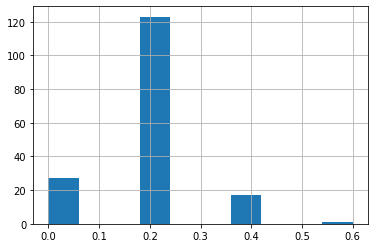

In [121]:
overlapping['%overlapping'].hist()

In [122]:
overlapping.describe()

,%overlapping
count,168.000000
mean,0.190476
std,0.106798
min,0.000000
25%,0.200000
50%,0.200000
75%,0.200000
max,0.600000


In [123]:
# overlapping score and correlation score
df1 = stats_data[['Target', 'KendalR']]
df = pd.merge(df1, overlapping, on=['Target'])

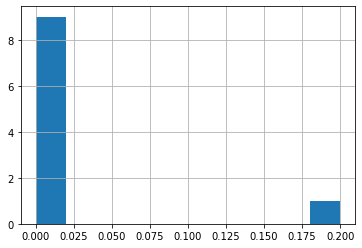

In [124]:
df[:10]['%overlapping'].hist()

In [125]:
df['KendalR'].corr(df['%overlapping'], method='kendall')

0.09888090656471296

In [126]:
# how frequently drugs appear in the top 10 drugs for each target

In [139]:
aggregation = {}
for filename in os.listdir(args.score_path):
    data = pd.read_csv(args.score_path + filename)
    data = data.sort_values(by=['InterfE'])[:5]
    for row in data.iterrows():
        drug = row[1]['Ligand-Name']
        drug = drug.split('_')
        drug = drug[-1]
        if drug not in aggregation:
            aggregation[drug] = 1
        else :
            aggregation[drug] += 1

In [141]:
aggregation = pd.DataFrame.from_dict(data=aggregation, orient='index', columns=['frequency'])
aggregation = aggregation.sort_values(by=['frequency'], ascending=False)

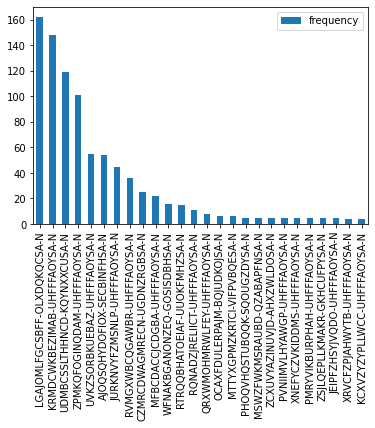

In [142]:
aggregation[:26].plot(kind='bar')

In [56]:
open('sorted_drugs_t1.txt', 'w').writelines(list_drugs)

In [22]:
# ligand LGAJOMLFGCSBFF-OLXDQKQCSA-N
data = []
for filename in os.listdir(args.score_path):
    df = pd.read_csv(args.score_path + filename)
    df = df[df['Ligand-Name'].str.contains('LGAJOMLFGCSBFF-OLXDQKQCSA-N')]
    df = df.dropna()
    if len(df) == 0:
        continue
    df = df.iloc[0]
    data.append([df['Target-Name'], df['InterfE']])

In [24]:
data = pd.DataFrame(data=data, columns=['Target-Name', 'InterfE'])

In [35]:
data = data.sort_values(by=['InterfE'])

In [38]:
data.to_csv('LGAJOMLFGCSBFF-OLXDQKQCSA-N.csv', index=False)

In [39]:
data = pd.read_csv('LGAJOMLFGCSBFF-OLXDQKQCSA-N.csv')

In [47]:
y = data['InterfE']
x = list(range(len(y)))

In [48]:
import matplotlib.pyplot as plt

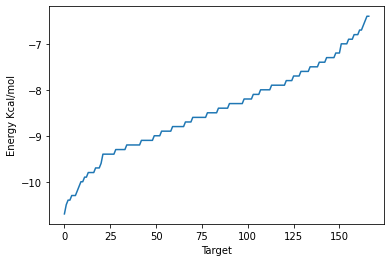

In [52]:
plt.xlabel('Target')
plt.ylabel('Energy Kcal/mol')
plt.plot(x, y)

## Miscellaneous

In [1]:
import os
import pandas as pd

In [2]:
data = []
for filename in os.listdir('./protein-pdb/'):
    data.append(filename.split('.')[0])

In [4]:
data = pd.DataFrame(data=data, columns=['receptor-name'])

In [5]:
data.to_csv('./target.csv')